# Exercises

## Exercise 1
---
Determine the effect of stimulus sequence duration on RF estimates. To do this, repeat the above steps for different durations (5 s, 10 s, 20 s, 40 s, 80 s, 160 s, 320 s, 640 s). Compute the Pearson correlation between true and estimated RFs for each duration to quantify the accuracy of the estimator. The Pearson correlation $\mathrm{cc}$ is defined as
$$
\mathrm{cc} = \frac{\mathbf{k}_\mathrm{true}^T \hat{\mathbf{k}}}{\lVert \mathbf{k}_\mathrm{true} \rVert \lVert \hat{\mathbf{k}} \rVert}
$$
where $\lVert \cdot \rVert$ is the L2-norm (vector length).
As the response generation process is stochastic, compute the average correlation across 10 realizations for the same duration and plot the average correlation as a function of duration. How is the recording duration related to the ability to recover the true RF? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

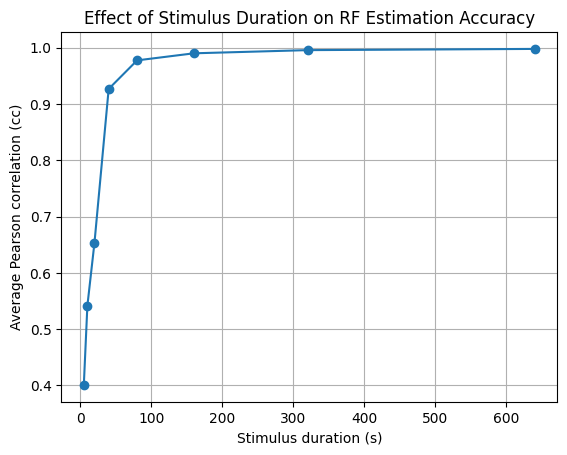

In [10]:
# create empty array for pearson correlation values to be stored in 
cc_list = []
# define stimulus sequence durations to be tested
durations = (5., 10., 20., 40., 80., 160., 320., 640.)

for time in durations:
    cc_instance = []
    for i in range(10):
        # generate the data
        duration = time
        dt = .1
        std_dev = 1
        vf_size = (15,15)
        n_bins = round(duration / float(dt))
        S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

        # create RF
        size = vf_size # size in pixel of our receptive field
        mu = (8, 8) # center of the gabor patch
        sigma = (4,4) #size of the gabor patch
        angle = 45 # orientation of the gabor patch
        frequency = .085 # spatial frequency of the gabor patch
        phase = 0 # phase of the gabor pathc


        xx, yy = np.meshgrid(1. + np.arange(size[0]), 1. + np.arange(size[1]))

        # Gaussian envelope
        G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0]) - np.power(yy - mu[1], 2) / (2. * sigma[1]))

        # spatial modulation
        phi = np.deg2rad(angle)
        xxr = xx * np.cos(phi)
        yyr = yy * np.sin(phi)
        xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
        Sn = np.cos(xyr + phase)

        K = G * Sn
        K /= np.amax(np.abs(K))

        noise_variance = 1
        offset = 2.

        # flatten the matrices to 1d array for convenience
        K_flat = K.ravel()
        K_flat = np.hstack((K.flat, offset))

        S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
        S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


        # 1. linear stage
        ks = np.dot(K_flat, S_flat.T)

        # 2. nonlinear stage (for a linear model: f -> identity function)
        rate = ks

        # add Gaussian noise centered around the "true" rate for each bin
        rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)

        # fitting GLM
        # K_hat = estimated filter; true filter = K
        K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
        K_hat = K_hat[:-1].reshape(vf_size)

        # flatten matrices into 1D vectors
        K_true_flat = K.ravel()
        K_hat_flat = K_hat.ravel()

        # calculate pearson correlation
        cc = (np.dot(K_true_flat, K_hat_flat))/(np.linalg.norm(K_true_flat) * np.linalg.norm(K_hat_flat))
        cc_instance.append(cc)
        
    # Average over 10 realizations
    cc_mean = np.mean(cc_instance)
    cc_list.append(cc_mean) 
    
# Plot
plt.figure()
plt.plot(durations, cc_list, marker='o')
plt.xlabel('Stimulus duration (s)')
plt.ylabel('Average Pearson correlation (cc)')
plt.title('Effect of Stimulus Duration on RF Estimation Accuracy')
plt.grid(True)

**Report**

To complete the exercise, I started by creating an empty array for the pearson correlation values and a list of stimulus presentation durations. I then looped through the durations, including another loop within each iteration, in order to calculate 10 pearson correlations values for each duration, which I could later average. I then used the code from class to generate data, create RFs and Gaussian envelopes, and then fitted a  linear Gaussian model for each. To calculate the pearson correlation, the resulting matrices (K true and K hat) had to be flattened again, in order to perform vector operations. 

**Observation**

As can be seen in the figure, the average pearson correlation increases with increasing stimulus duration. This increase is very rapid up until 80s, at which point the correlation is nearly 1.0, and then it plateaus, with further stimulus duration increases nearing 1.0. As such, the relationship between the pearson correlation and stimulus duration is logarithmic: the longer the stimulus duration, the better the ability to recover the true RF, however, improvements plateau at very long durations.   

This can be explained by the fact that when collecting more data, the signal to noise ratio improves, as random noise tends to average out over longer durations. The estimated RF therefore becomes more accurate and aligns more closely with the true RF.

## Exercise 2
---
Determine the effect of response noise ($\sigma^2$) on RF estimates. Try different value for the noise variance in the simulations, e.g., 0, 2, 4, 6, 8, and 10 for a duration of 100 s. As in the previous excercise, repeatedly estimate RF parameters for each condition (10 times) but this time also plot the standard deviation of the correlations across the different runs for each condition.

## Exercise 3
---
Look at the analytical derivation of the log-likelihood for the poisson GLM.
Which of the terms are required for maximizing the likelihood with respect to $\mathbf{k}$ and which terms can be ignored? **Note:** due to the independence of spikes in the different bins, the likelihood can be written as $P(R | S, \mathbf{k}) = \prod_t^T P(r_t | \mathbf{s}_t, \mathbf{k})$. The log turns the product into a sum which makes life much easier. 




## Exercise 4
---
Explore the effect of the data duration and the firing rate on the goodness of fit of the Poisson GLM.

A - Generate data with durations of 10,20,50,100 and 200 seconds. Fit the model on each dataset and plot the fitted parameters.
Use the pearson correlation as a proxy of the goodness of fit, and plot it as a function of the duration of the data.

B - Fix the duration to 100s, and change the average firing rate of the simulation. How does the fit perform for different firing rates? 